### Import the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import datetime
import warnings
warnings.filterwarnings('ignore')


### Import Libraries and Load Dataset

In [4]:
# Load the dataset from a CSV file
df = pd.read_csv(r"C:\Users\User\Downloads\ab_data.csv")

# Display the first few rows of the dataset
print(df.head())


   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


## Data Exploration and Pre-Processing

In [5]:
# Print the shape of the dataset
df.shape

(294478, 5)

In [ ]:
# Display concise summary information about the dataset
df.info()

In [6]:
# Print the column names of the dataset
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [7]:
# Check the number of unique values in each column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [8]:
print("There are {} duplicated values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(4)

There are 0 duplicated values.


,user_id,timestamp,group,landing_page,converted


In [ ]:
#new_data = df.drop_duplicates()
#new_data

In [ ]:
#new_data.duplicated().sum()

In [10]:
# Check the data types of each column
data_types = df.dtypes
print(data_types)

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object


In [11]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [15]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [16]:
# Calculate the range of dates in the dataset
date_range = pd.to_datetime(df.timestamp.max()) - pd.to_datetime(df.timestamp.min())
print(date_range)

21 days 23:59:49.081927


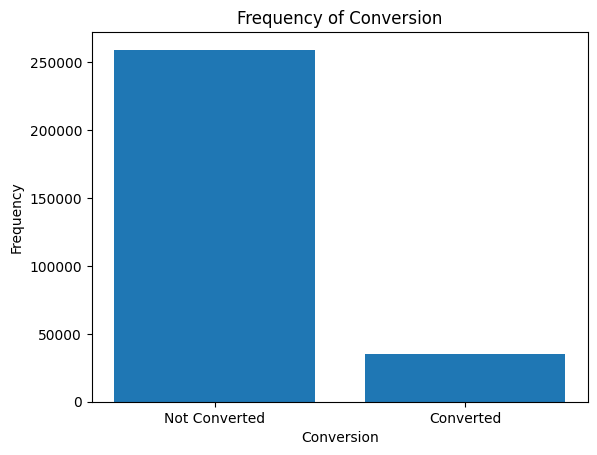

In [22]:
conversion_counts = df['converted'].value_counts()

plt.bar(conversion_counts.index, conversion_counts.values)
plt.xlabel('Conversion')
plt.ylabel('Frequency')
plt.title('Frequency of Conversion')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()


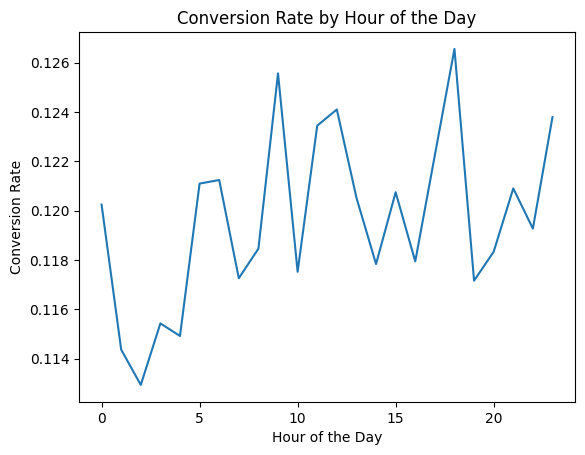

In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour

conversion_by_hour = df.groupby('hour')['converted'].mean()

plt.plot(conversion_by_hour.index, conversion_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Hour of the Day')
plt.show()


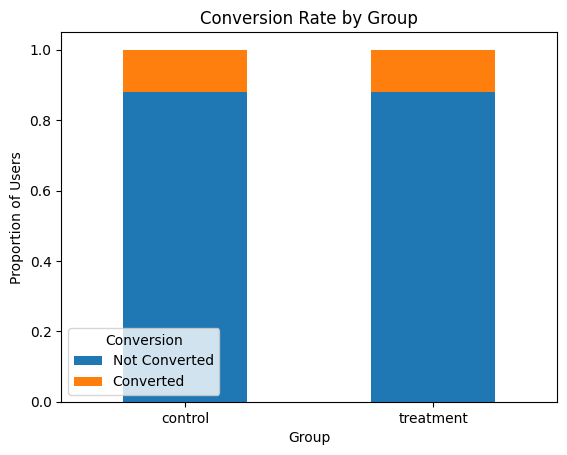

In [23]:
conversion_counts_by_group = df.groupby('group')['converted'].value_counts(normalize=True).unstack()

conversion_counts_by_group.plot(kind='bar', stacked=True)
plt.xlabel('Group')
plt.ylabel('Proportion of Users')
plt.title('Conversion Rate by Group')
plt.xticks(rotation=0)
plt.legend(title='Conversion', labels=['Not Converted', 'Converted'])
plt.show()


### Formulate Hypotheses:

#### Ho:The null hypothesis typically states that there is no difference or no effect between the control and treatment groups. In the context of an A/B test, it often asserts that the treatment (new feature, new design, etc.) has no impact on the outcome compared to the control (existing feature, old design, etc.).
#### H1: The alternative hypothesis contradicts the null hypothesis and typically states that there is a significant difference or effect between the control and treatment groups. In the context of an A/B test, it asserts that the treatment has a positive or negative impact on the outcome compared to the control.

#### significance level: 5%

### Calculate Test Statistics: 

#### Z-test for Proportions:

In [24]:
# Calculate conversion counts for control and treatment groups
control_converted = df[df['group'] == 'control']['converted'].sum()
treatment_converted = df[df['group'] == 'treatment']['converted'].sum()

# Calculate sample sizes for control and treatment groups
control_total = len(df[df['group'] == 'control'])
treatment_total = len(df[df['group'] == 'treatment'])

# Perform Z-test for proportions
z_stat, p_value = proportions_ztest([control_converted, treatment_converted], [control_total, treatment_total])

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 1.2369217547321678
P-value: 0.21611613269757501


#### Chi-square Test:

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['group'], df['converted'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 1.5159618356336582
P-value: 0.2182316121631168


#### For the Z-test for proportions:
#### Z-statistic: 1.2369
#### P-value: 0.2161
#### Since the p-value (0.2161) is greater than the significance level, we fail to reject the null hypothesis There is insufficient evidence to suggest a significant difference in conversion rates between the control and treatment groups.

#### For the chi-square test:
#### Chi-square statistic: 1.5160
#### P-value: 0.2182
#### Similar to the Z-test, the p-value (0.2182) is greater than the significance level , we fail to reject the null hypothesis There is insufficient evidence to suggest a significant difference in conversion rates between the control and treatment groups.

#### Since both tests yield p-values greater than 0.05, we cannot conclude that there is a significant difference in conversion rates between the control and treatment groups at the 0.05 significance level.